In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data_train_path = "train"
data_test_path = "test"
data_val_path = "validation"

In [3]:
img_width = 180
img_height = 180

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


In [5]:
data_cat = data_train.class_names

In [53]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [6]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 351 files belonging to 36 classes.


In [7]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


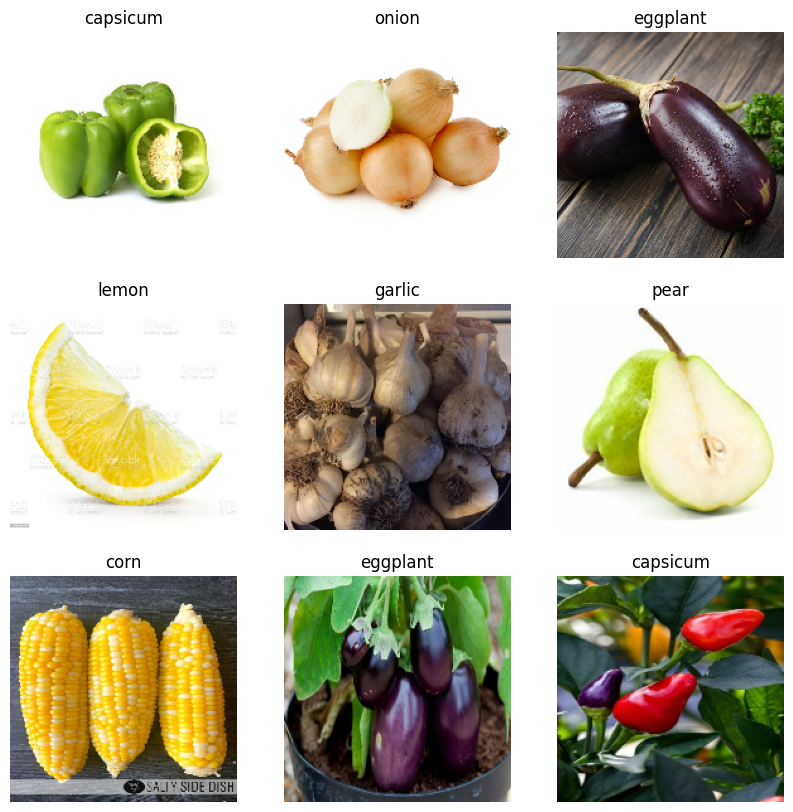

In [24]:
plt.figure(figsize=(10,10))
for image,label in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[label[i]])
        plt.axis('off')

In [9]:
from tensorflow.keras.models import Sequential


In [16]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [17]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [46]:
epochs_size = 25
history = model.fit(data_train,validation_data=data_val,epochs=epochs_size)

Epoch 1/25


98/98 ━━━━━━━━━━━━━━━━━━━━ 94s 896ms/step - accuracy: 0.9759 - loss: 0.1241 - val_accuracy: 0.9573 - val_loss: 0.2450
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.9766 - loss: 0.1046 - val_accuracy: 0.9573 - val_loss: 0.2987
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.9785 - loss: 0.1218 - val_accuracy: 0.9544 - val_loss: 0.2686
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.9769 - loss: 0.1063 - val_accuracy: 0.9573 - val_loss: 0.2818
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 87s 874ms/step - accuracy: 0.9833 - loss: 0.0768 - val_accuracy: 0.9516 - val_loss: 0.3306
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 85s 859ms/step - accuracy: 0.9823 - loss: 0.0791 - val_accuracy: 0.9544 - val_loss: 0.3207
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 70s 698ms/step - accuracy: 0.9833 - loss: 0.0702 - val_accuracy: 0.9516 - val_loss: 0.2739
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 84s 845ms/step - accuracy: 0.9859 - loss: 0.0695 - val_accuracy: 0.9573 - va

Text(0.5, 1.0, 'Loss')

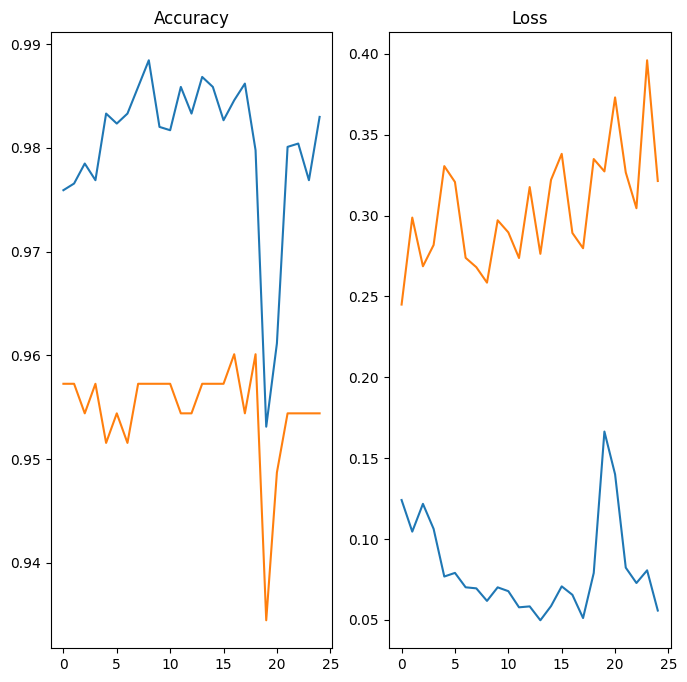

In [47]:
epochs_range= range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation Loss')
plt.title('Loss')   

In [48]:
# image = 'apple.jpg'
# image = 'banana.jpg'
image = 'chilli.jpg'
# image = 'corn.jpg'
image = tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)


In [49]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step


In [50]:
score = tf.nn.softmax(predict)

In [51]:
print("Veg/Fruit in img is {} with accuracy of {:0.2f}%".format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in img is chilli pepper with accuracy of 91.66%


In [52]:
model.save('Image_classofy.keras')